In [2]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

In [3]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [4]:
start1= file1.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end1= file1.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})
recolen1= file1['rec.reco.trk.len'].array()
truthlen1= file1['rec.reco.trk.truth.p.length'].array()

energy1= file1['rec.reco.trk.calo.2.ke'].array()
dedx1= file1['rec.reco.trk.calo.2.points.dedx'].array()
rr1= file1['rec.reco.trk.calo.2.points.rr'].array()
#================================================================================
start2= file2.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end2= file2.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})
recolen2= file2['rec.reco.trk.len'].array()
truthlen2= file2['rec.reco.trk.truth.p.length'].array()

energy2= file2['rec.reco.trk.calo.2.ke'].array()
dedx2= file2['rec.reco.trk.calo.2.points.dedx'].array()
rr2= file2['rec.reco.trk.calo.2.points.rr'].array()
#================================================================================
start3= file3.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end3= file3.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})   
recolen3= file3['rec.reco.trk.len'].array()
truthlen3= file3['rec.reco.trk.truth.p.length'].array()
energy3= file3['rec.reco.trk.calo.2.ke'].array()
dedx3= file3['rec.reco.trk.calo.2.points.dedx'].array()
rr3= file3['rec.reco.trk.calo.2.points.rr'].array()
#================================================================================
start4= file4.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end4= file4.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})  
recolen4= file4['rec.reco.trk.len'].array()
truthlen4= file4['rec.reco.trk.truth.p.length'].array()
energy4= file4['rec.reco.trk.calo.2.ke'].array()
dedx4= file4['rec.reco.trk.calo.2.points.dedx'].array()
rr4= file4['rec.reco.trk.calo.2.points.rr'].array()
#================================================================================
start5= file5.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end5= file5.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'}) 
recolen5= file5['rec.reco.trk.len'].array()
truthlen5= file5['rec.reco.trk.truth.p.length'].array()

energy5= file5['rec.reco.trk.calo.2.ke'].array()
dedx5= file5['rec.reco.trk.calo.2.points.dedx'].array()
rr5= file5['rec.reco.trk.calo.2.points.rr'].array()

In [5]:
def get_cut(start, end):
    cut_xf= (np.absolute(end['xf'])<200)    
    cut_yf= (np.absolute(end['yf'])<200)
    cut_zf0= (end['zf'])>0
    cut_zf1= (end['zf'])<500

    cut_x0= (np.absolute(start['x0'])<200) 
    cut_y0= (np.absolute(start['y0'])<200)
    cut_z00= (start['z0'])>0
    cut_z01= (start['z0'])<500

    cut_full= cut_xf & cut_yf & cut_zf0 & cut_zf1 & cut_x0 & cut_y0 & cut_z00 & cut_z01 


    return cut_full

In [6]:
cut1= get_cut(start1, end1)
cut2= get_cut(start2, end2)
cut3= get_cut(start3, end3)
cut4= get_cut(start4, end4)
cut5= get_cut(start5, end5)

negcut1= ~get_cut(start1, end1)
negcut2= ~get_cut(start2, end2)
negcut3= ~get_cut(start3, end3)
negcut4= ~get_cut(start4, end4)
negcut5= ~get_cut(start5, end5)

In [7]:
print(ak.count(cut1))
print(ak.count_nonzero(cut1))
print(ak.count_nonzero(negcut1))

42847
10430
32417


In [8]:
ak.count_nonzero(cut2)

10886

In [9]:
recolen= ak.ravel(ak.concatenate([recolen1[cut1], recolen2[cut2], recolen3[cut3], recolen4[cut4], recolen5[cut5]]))
truthlen= ak.ravel(ak.concatenate([truthlen1[cut1], truthlen2[cut2], truthlen3[cut3], truthlen4[cut4], truthlen5[cut5]]))

energy= ak.ravel(ak.concatenate([energy1[negcut1], energy2[negcut2], energy3[negcut3], energy4[negcut4], energy5[negcut5]]))
dedx= ak.ravel(ak.concatenate([dedx1, dedx2, dedx3, dedx4, dedx5]))
rr= ak.ravel(ak.concatenate([rr1, rr2, rr3, rr4, rr5]))

In [10]:
recolen= ak.ravel(recolen1[cut1])
truthlen= ak.ravel(truthlen1[cut1])

The ratio of Data/Mc is 1.5787762218945829


<Figure size 640x480 with 0 Axes>

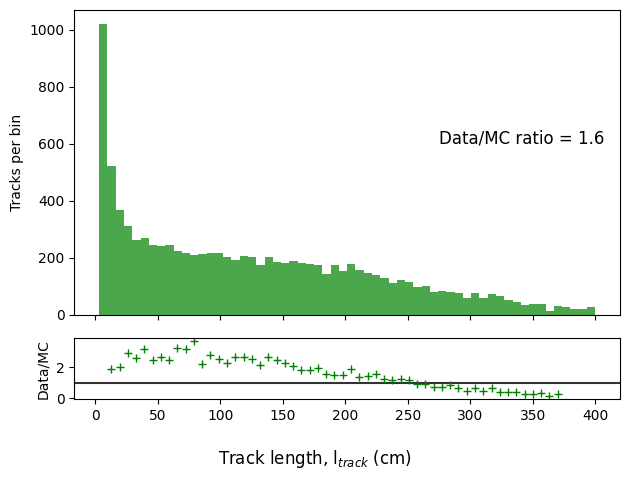

In [11]:
truth_length= np.delete(truthlen, np.where((truthlen<3) | (truthlen>400)))
reco_length= np.delete(recolen, np.where((recolen<3) | (recolen>400)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
x_axis= bins[:-1]+bins[0]
h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length[1:], bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
# fig.suptitle('Reconstructed track length', size= 'x-large')
fig.supxlabel(r'Track length, l$_{track}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
# ax1.text(275, 800, 'Tracks > 25 cm', family='sans-serif', size= 'large')
ax1.text(275,600, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

Text(3.2, 15500, 'rr $\\in$ [0 , 5] cm')

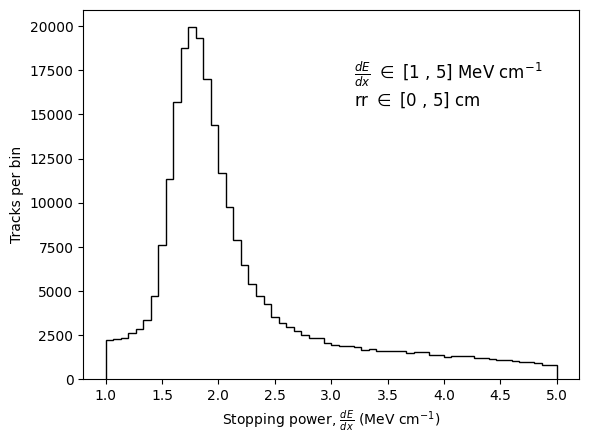

In [12]:
remove= np.where((dedx<1)|(dedx>5)|(rr>25) | (rr>5))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)
h, b,_=plt.hist(dedx[dedx<5], bins= 60,  color= 'k', histtype=u'step')
x= b[:-1] +(b[1]-b[0])
plt.ylabel('Tracks per bin')
plt.xlabel(r'Stopping power, $\frac{dE}{dx}$ (MeV cm$^{-1}$)')
plt.text(3.2,17000, r'$\frac{dE}{dx}$ $\in$ [1 , 5] MeV cm$^{-1}$', size= 'large')
plt.text(3.2,15500, r'rr $\in$ [0 , 5] cm', size= 'large')

In [13]:
x[np.argmax(h)]

1.8000433